# Κατηγοριοποίηση Εικόνων Κατοικιδίων από την Πραγματική Ζωή

Εργαστηριακή Άσκηση από το [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

Ήρθε η ώρα να ασχοληθούμε με μια πιο απαιτητική εργασία - την κατηγοριοποίηση του αρχικού [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Ας ξεκινήσουμε φορτώνοντας και οπτικοποιώντας το σύνολο δεδομένων.


In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!tar xfz images.tar.gz
!rm images.tar.gz

Θα ορίσουμε μια γενική συνάρτηση για την εμφάνιση μιας σειράς εικόνων από μια λίστα:


In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

Μπορείτε να δείτε ότι όλες οι εικόνες βρίσκονται σε έναν κατάλογο που ονομάζεται `images`, και το όνομά τους περιέχει το όνομα της κατηγορίας (ράτσας):


In [ ]:
fnames = os.listdir('images')[:5]
display_images([Image.open(os.path.join('images',x)) for x in fnames],titles=fnames,fontsize=30)

Για να απλοποιήσουμε την ταξινόμηση και να χρησιμοποιήσουμε την ίδια προσέγγιση για τη φόρτωση εικόνων όπως στο προηγούμενο μέρος, ας ταξινομήσουμε όλες τις εικόνες σε αντίστοιχους καταλόγους:


In [ ]:
for fn in os.listdir('images'):
    cls = fn[:fn.rfind('_')].lower()
    os.makedirs(os.path.join('images',cls),exist_ok=True)
    os.replace(os.path.join('images',fn),os.path.join('images',cls,fn))

Ας ορίσουμε επίσης τον αριθμό των κατηγοριών στο σύνολο δεδομένων μας:


In [2]:
num_classes = len(os.listdir('images'))
num_classes

37

## Προετοιμασία συνόλου δεδομένων για Μηχανική Μάθηση

Για να ξεκινήσουμε την εκπαίδευση του νευρωνικού μας δικτύου, πρέπει να μετατρέψουμε όλες τις εικόνες σε τανυστές, καθώς και να δημιουργήσουμε τανυστές που αντιστοιχούν στις ετικέτες (αριθμούς κατηγοριών). Τα περισσότερα πλαίσια νευρωνικών δικτύων περιέχουν απλά εργαλεία για τη διαχείριση εικόνων:
* Στο Tensorflow, χρησιμοποιήστε `tf.keras.preprocessing.image_dataset_from_directory`
* Στο PyTorch, χρησιμοποιήστε `torchvision.datasets.ImageFolder`

Όπως είδατε από τις παραπάνω εικόνες, όλες έχουν αναλογία κοντά σε τετράγωνο, οπότε πρέπει να αλλάξουμε το μέγεθος όλων των εικόνων σε τετράγωνο μέγεθος. Επίσης, μπορούμε να οργανώσουμε τις εικόνες σε μικροπαρτίδες.


In [3]:
# PREPARE THE DATASET

Τώρα πρέπει να χωρίσουμε το σύνολο δεδομένων σε τμήματα εκπαίδευσης και δοκιμής:


In [4]:
# SPLIT INTO TRAIN-TEST DATASETS

Τώρα ορίστε τους φορτωτές δεδομένων:


In [5]:
# DEFINE DATA LOADERS if needed

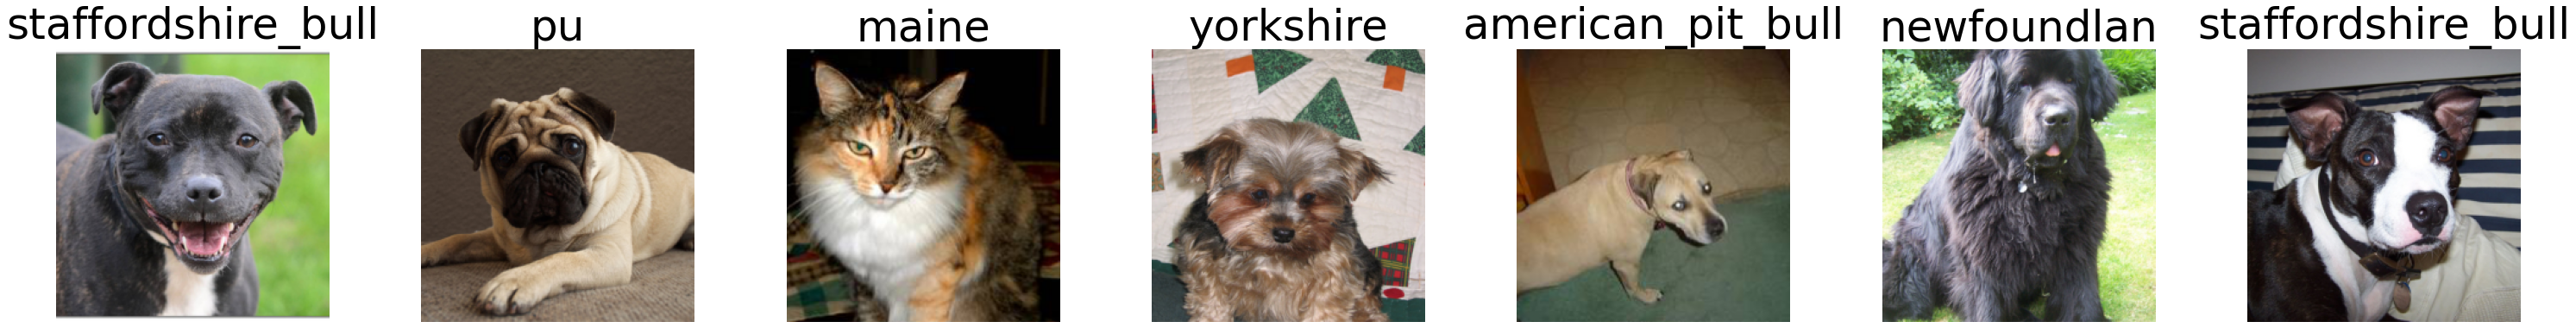

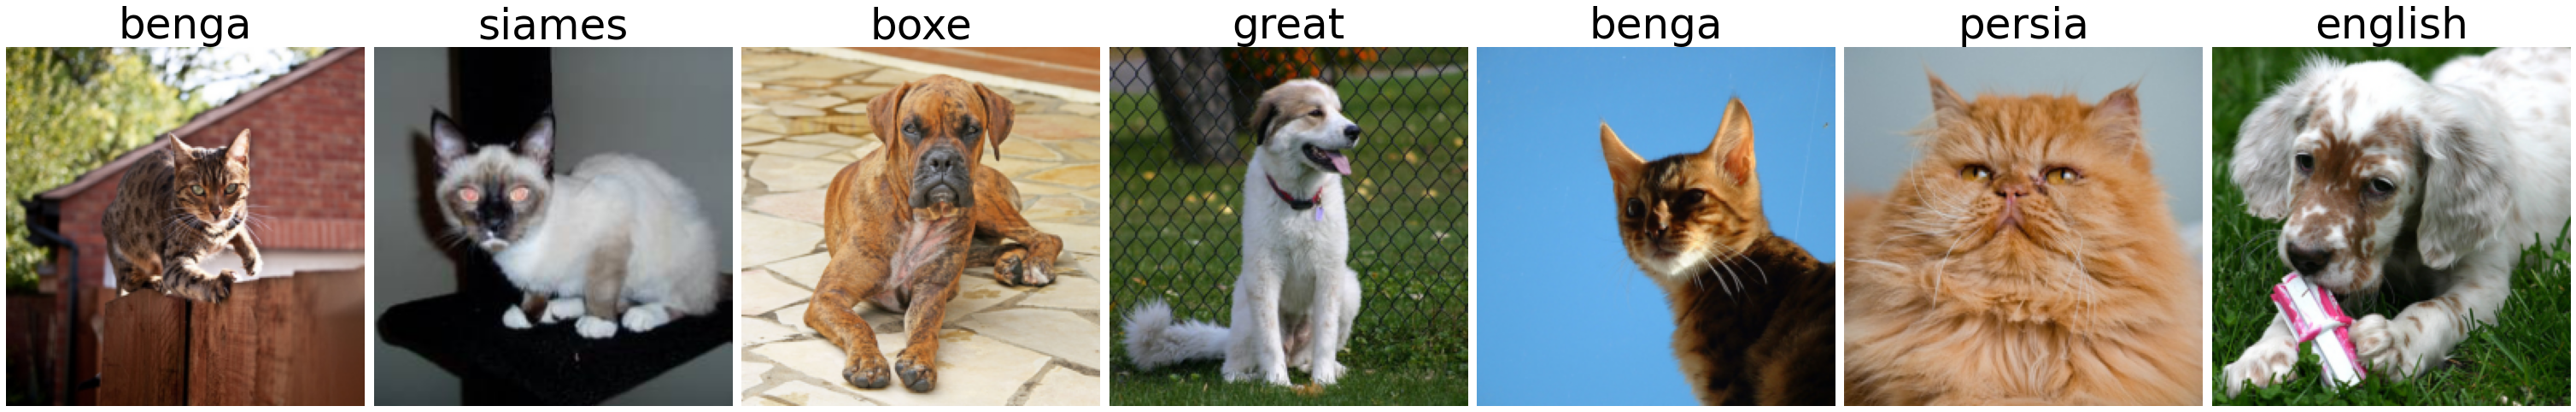

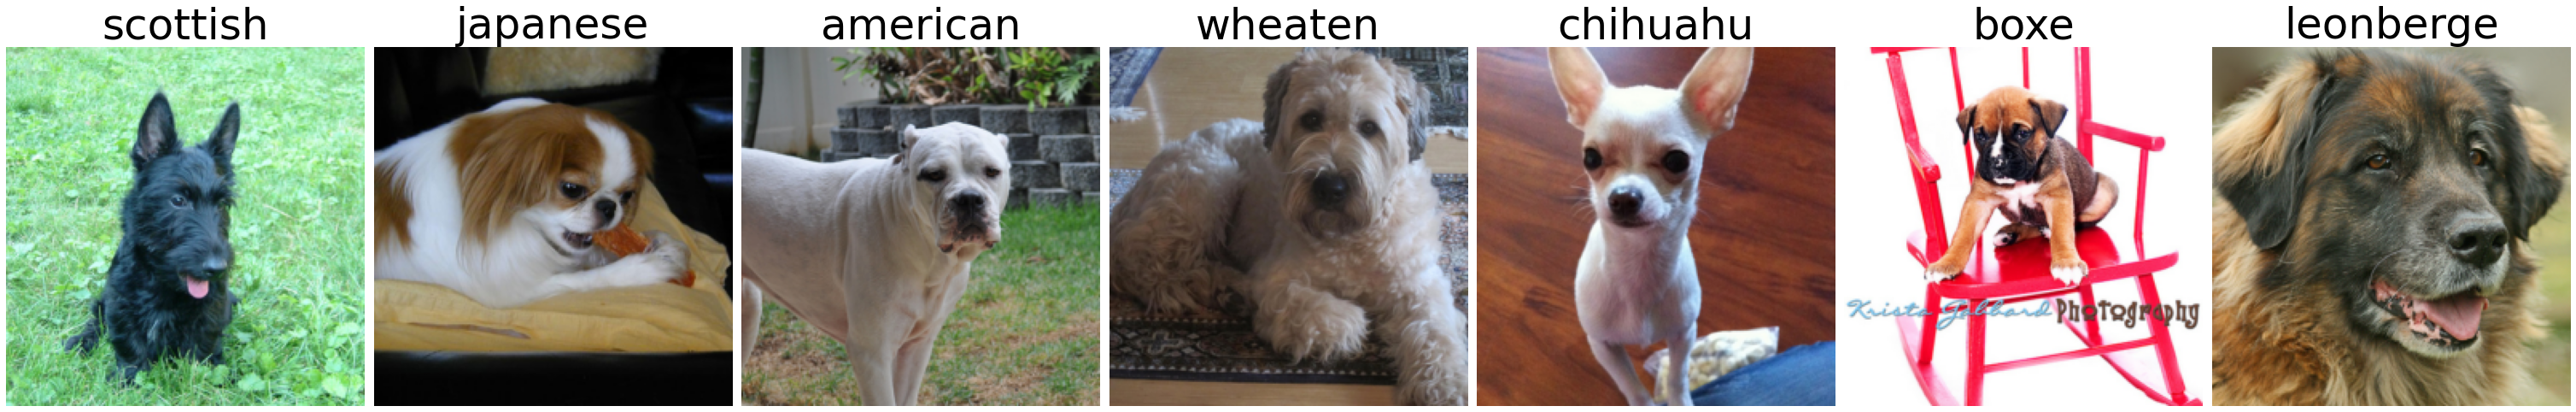

In [6]:
# [OPTIONAL] Plot the dataset

## Ορισμός ενός νευρωνικού δικτύου

Για την ταξινόμηση εικόνων, πιθανότατα θα πρέπει να ορίσετε ένα συνελικτικό νευρωνικό δίκτυο με αρκετά επίπεδα. Τι να προσέξετε:
* Να έχετε υπόψη την αρχιτεκτονική πυραμίδας, δηλαδή ο αριθμός των φίλτρων πρέπει να αυξάνεται όσο προχωράτε σε βάθος.
* Μην ξεχνάτε τις συναρτήσεις ενεργοποίησης μεταξύ των επιπέδων (ReLU) και το Max Pooling.
* Ο τελικός ταξινομητής μπορεί να έχει ή να μην έχει κρυφά επίπεδα, αλλά ο αριθμός των νευρώνων εξόδου πρέπει να είναι ίσος με τον αριθμό των κατηγοριών.

Ένα σημαντικό σημείο είναι να επιλέξετε σωστά τη συνάρτηση ενεργοποίησης στο τελευταίο επίπεδο και τη συνάρτηση απώλειας:
* Στο Tensorflow, μπορείτε να χρησιμοποιήσετε τη `softmax` ως συνάρτηση ενεργοποίησης και τη `sparse_categorical_crossentropy` ως συνάρτηση απώλειας. Η διαφορά μεταξύ της sparse categorical cross-entropy και της μη-sparse είναι ότι η πρώτη αναμένει την έξοδο ως αριθμό κατηγορίας και όχι ως one-hot διάνυσμα.
* Στο PyTorch, μπορείτε να έχετε το τελευταίο επίπεδο χωρίς συνάρτηση ενεργοποίησης και να χρησιμοποιήσετε τη συνάρτηση απώλειας `CrossEntropyLoss`. Αυτή η συνάρτηση εφαρμόζει αυτόματα τη softmax.

> **Υπόδειξη:** Στο PyTorch, μπορείτε να χρησιμοποιήσετε το επίπεδο `LazyLinear` αντί για το `Linear`, για να αποφύγετε τον υπολογισμό του αριθμού εισόδων. Απαιτεί μόνο την παράμετρο `n_out`, που είναι ο αριθμός των νευρώνων στο επίπεδο, και η διάσταση των δεδομένων εισόδου καθορίζεται αυτόματα κατά την πρώτη διέλευση `forward`.


In [11]:
# DEFINE NEURAL NETWORK ARCHITECTURE

## Εκπαίδευση του Νευρωνικού Δικτύου

Τώρα είμαστε έτοιμοι να εκπαιδεύσουμε το νευρωνικό δίκτυο. Κατά τη διάρκεια της εκπαίδευσης, παρακαλώ συλλέξτε την ακρίβεια στα δεδομένα εκπαίδευσης και δοκιμής σε κάθε εποχή και στη συνέχεια σχεδιάστε την ακρίβεια για να δείτε αν υπάρχει υπερεκπαίδευση.


In [1]:
# TRAIN THE NEURAL NETWORK

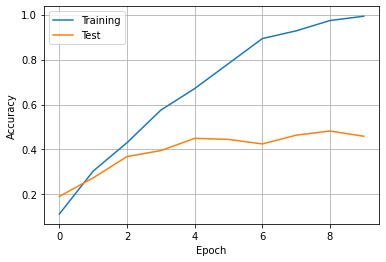

In [12]:
# PLOT THE RESULT: Train and Test Accuracy

## Μεταφορά Μάθησης

Για να βελτιώσουμε την ακρίβεια, ας χρησιμοποιήσουμε ένα προεκπαιδευμένο νευρωνικό δίκτυο ως εξαγωγέα χαρακτηριστικών. Μπορείτε να πειραματιστείτε με μοντέλα όπως VGG-16/VGG-19, ResNet50, κ.λπ.

> Επειδή αυτή η εκπαίδευση είναι πιο αργή, μπορείτε να ξεκινήσετε εκπαιδεύοντας το μοντέλο για μικρό αριθμό εποχών, π.χ. 3. Μπορείτε πάντα να συνεχίσετε την εκπαίδευση για να βελτιώσετε περαιτέρω την ακρίβεια, αν χρειαστεί.

Χρειάζεται να κανονικοποιήσουμε τα δεδομένα μας διαφορετικά για τη μεταφορά μάθησης, επομένως θα φορτώσουμε ξανά το σύνολο δεδομένων χρησιμοποιώντας διαφορετικό σύνολο μετασχηματισμών:


In [2]:
# LOAD THE DATASET
# Perform standard transformations for VGG-16/VGG-19 if needed 

In [3]:
# vgg = ...

Τώρα ορίστε το μοντέλο ταξινόμησης για το πρόβλημά σας:
* Στο PyTorch, υπάρχει μια θέση που ονομάζεται `classifier`, την οποία μπορείτε να αντικαταστήσετε με τον δικό σας ταξινομητή για τον επιθυμητό αριθμό κατηγοριών.
* Στο TensorFlow, χρησιμοποιήστε το δίκτυο VGG ως εξαγωγέα χαρακτηριστικών και δημιουργήστε ένα μοντέλο `Sequential` με το VGG ως πρώτο επίπεδο και τον δικό σας ταξινομητή από πάνω.


In [52]:
# BUILD MODEL for your problem with your own linear layers

Βεβαιωθείτε ότι όλες οι παράμετροι του εξαγωγέα χαρακτηριστικών VGG δεν είναι εκπαιδεύσιμες


In [4]:
# MAKE VGG Layers not trainable

Τώρα μπορούμε να ξεκινήσουμε την εκπαίδευση. Να είστε πολύ υπομονετικοί, καθώς η εκπαίδευση διαρκεί πολύ χρόνο, και η συνάρτηση εκπαίδευσής μας δεν είναι σχεδιασμένη να εκτυπώνει οτιδήποτε πριν από το τέλος της εποχής.


In [5]:
# TRAIN THE MODEL

Φαίνεται πολύ καλύτερο τώρα!

## Προαιρετικό: Υπολογισμός Ακρίβειας Top 3

Μπορούμε επίσης να υπολογίσουμε την ακρίβεια Top 3 χρησιμοποιώντας τον ίδιο κώδικα όπως στην προηγούμενη άσκηση.


In [6]:
# CALCULATE TOP-3 Accuracy of the model


---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης AI [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε κάθε προσπάθεια για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
